In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# python 实现链表

In [47]:
class Node(object):
    """单链表的结点"""

    def __init__(self, item):
        # item存放数据元素
        self.item = item
        # next是下一个节点的标识
        self.next = None

class SingleLinkList(object):

    def __init__(self):
        self._head = None
    def is_empty(self):
        """判断链表是否为空"""
        return self._head is None

    def length(self):
        """链表长度"""
        # 初始指针指向head
        cur = self._head
        count = 0
        # 指针指向None 表示到达尾部
        while cur is not None:
            count += 1
            # 指针下移
            cur = cur.next
        return count

    def items(self):
        """遍历链表"""
        # 获取head指针
        cur = self._head
        # 循环遍历
        while cur is not None:
            # 返回生成器
            yield cur.item
            # 指针下移
            cur = cur.next

    def add(self, item):
        """向链表头部添加元素"""
        node = Node(item)
        # 新结点指针指向原头部结点
        node.next = self._head
        # 头部结点指针修改为新结点
        self._head = node

    def append(self, item):
        """尾部添加元素"""
        node = Node(item)
        # 先判断是否为空链表
        if self.is_empty():
            # 空链表，_head 指向新结点
            self._head = node
        else:
            # 不是空链表，则找到尾部，将尾部next结点指向新结点
            cur = self._head
            while cur.next is not None:
                cur = cur.next
            cur.next = node

    def insert(self, index, item):
        """指定位置插入元素"""
        # 指定位置在第一个元素之前，在头部插入
        if index <= 0:
            self.add(item)
        # 指定位置超过尾部，在尾部插入
        elif index > (self.length() - 1):
            self.append(item)
        else:
            # 创建元素结点
            node = Node(item)
            cur = self._head
            # 循环到需要插入的位置
            for i in range(index - 1):
                cur = cur.next
            node.next = cur.next
            cur.next = node

    def remove(self, item):
        """删除节点"""
        cur = self._head
        pre = None
        while cur is not None:
            # 找到指定元素
            if cur.item == item:
                # 如果第一个就是删除的节点
                if not pre:
                    # 将头指针指向头节点的后一个节点
                    self._head = cur.next
                else:
                    # 将删除位置前一个节点的next指向删除位置的后一个节点
                    pre.next = cur.next
                return True
            else:
                # 继续按链表后移节点
                pre = cur
                cur = cur.next

    def find(self, item):
        """查找元素是否存在"""
        return item in self.items()
    def DeleteBeforeItem(self, item):
        'return the position of an item, 使用头插法'
        i = 0
        cur = self._head
        while cur.item != item:
            cur = cur.next
        if cur.item == item:
            self._head = cur




# add aligient

In [48]:
class Robot:

    def __init__(self, num_actions):
        self.num_actions = num_actions

    def choose_action(self, state, reward_point):
        del state
        return np.random.randint(self.num_actions)

class Aligient:
    def __init__(self, board):
        self.board = board
        self.num_rows, self.num_cols = board.shape
        self.num_states = self.num_rows * self.num_cols
        self.num_actions = 4
        self.reward_table = self.get_reward_table()
        self.transition_model = self.get_transition_model()
        self.start_pos = (0, 0)
        self.action = 0
        self.trace_list = SingleLinkList()

    def choose_action(self, state, reward_point):
        cur_pos = self.get_pos_from_state(state)
        rate = 0.05
        del state
        x , y = reward_point[0][0] - cur_pos[0], reward_point[0][1] - cur_pos[1]
        rate_x, rate_y = abs(x)/(abs(x) + abs(y)), abs(y)/(abs(x) + abs(y)) 
        if   x > 0 & y > 0:
            self.action = np.random.choice(4, p=[rate,rate_x + rate,rate_y + rate,rate])
            #action = 2
        elif x < 0 & y > 0:
            self.action = np.random.choice(4, p=[rate,rate,rate_y + rate,rate_x + rate])
            #action = 0
        elif y < 0 & x > 0:
            self.action = np.random.choice(4, p=[rate_y + rate,rate_x + rate,rate,rate])
            #action = 1
        elif y < 0 & x < 0:
            self.action = np.random.choice(4, p=[rate_y + rate,rate,rate,rate_x + rate])
            #action = 3
#        return action


    def get_state_from_pos(self, pos):
        """Maps (x, y) position on the board to state index
        """
        return pos[0] * self.num_cols + pos[1]
    def get_pos_from_state(self, state):
        """Maps state index to (x, y) position on the board
        """
        return state // self.num_cols, state % self.num_cols
    def get_reward_table(self):
        """Map each state to its corresponding reward.
        """
        reward_table = np.zeros(self.num_states)
        for r in range(self.num_rows):
            for c in range(self.num_cols):
                s = self.get_state_from_pos((r, c))
                reward_table[s] = self.board[r, c]
        return reward_table
    def get_transition_model(self, random_rate=0.1):
        """The transition_model describing the probability of environment 
        next state (s') given that we are currently at state (s) and take 
        P = P[s' | (s, a)]
        """
        transition_model = np.zeros(
            (self.num_states, self.num_actions, self.num_states))
        for r in range(self.num_rows):
            for c in range(self.num_cols):
                s = self.get_state_from_pos((r, c))
                possible_s_prime = np.zeros(self.num_actions)
                if self.board[r, c] == 0:
                    for a in range(self.num_actions):
                        new_r, new_c = r, c
                        if a == 0:
                            new_r = max(r - 1, 0)  #go to south
                        elif a == 1:
                            new_c = min(c + 1, self.num_cols - 1) #go to east
                        elif a == 2:
                            new_r = min(r + 1, self.num_rows - 1) #go to north
                        elif a == 3:
                            new_c = max(c - 1, 0)  # go to west
                        if self.board[new_r, new_c] == 2:  #detect obstacle
                            new_r, new_c = r, c
                        s_prime = self.get_state_from_pos((new_r, new_c))
                        possible_s_prime[a] = s_prime   
                else:
                    possible_s_prime = np.ones(self.num_actions) * s   #over
                for a in range(self.num_actions):
                    transition_model[s, a, int(
                        possible_s_prime[a])] += 1 - random_rate
                    transition_model[s, a, int(
                        possible_s_prime[(a + 1) % self.num_actions])] += random_rate/2
                    transition_model[s, a, int(
                        possible_s_prime[(a - 1) % self.num_actions])] += random_rate/2
        return transition_model
    def reset(self):
        self.trace_list.add(self.start_pos)
        self.cur_state = self.get_state_from_pos(self.start_pos)
        self.reward = 0
        return self.cur_state
    def step(self):
        p = self.transition_model[self.cur_state, self.action]
        next_state = np.random.choice(self.num_states, p=p)
        self.reward = self.reward_table[next_state]
        self.cur_state = next_state
        cur_pos = self.get_pos_from_state(self.cur_state)
        
        if self.trace_list.find(cur_pos):
            self.trace_list.DeleteBeforeItem(cur_pos)
        else:
            self.trace_list.add(cur_pos)

        done = False
        if self.reward != 0:
            done = True
        return self.cur_state, self.trace_list, self.reward, done, []


# matiplotlib


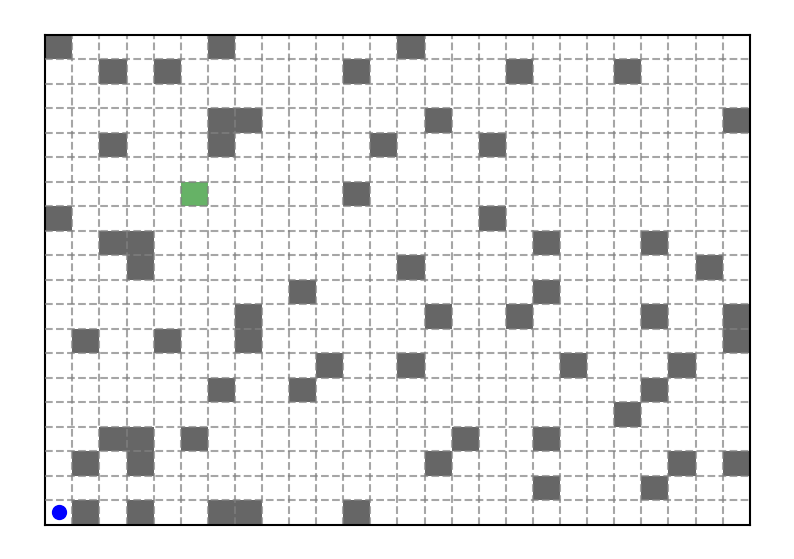

In [49]:

#plt.xkcd()
num_cols = 26
num_rows = 20
unit = 1 

#board[1, 1] = 2
#board[0, 3] = 1
#board[1, 3] = -1
fig_size=(10,7)

def reset_env(reward_num, track_num, obs_num):
  total_num = reward_num + track_num + obs_num
  board = np.zeros((num_rows, num_cols))
  start_pos = (0,0)
  board_set =[]
  reward_point = []
  obs_point = []
# board[2][1] = 1
  if total_num > num_cols*num_rows:
       #assert("ArithmeticError")
       print("out of  boardsize!")
       return
  else:     
       for i in range(total_num):
             if i < reward_num:
                   while len(board_set) < i + 1:
                     m , n = random.randint(0, num_rows-1), random.randint(0, num_cols-1)
                     if ((m,n) not in board_set)& ((m,n) != start_pos):#
                           board_set.append((m,n))
                           board[m][n] = 1
                           reward_point.append((m,n))
#                elif i < reward_num + track_num:
#                    while len(board_set) < i + 1:
#                        m , n = random.randint(0, num_rows-1), random.randint(0, num_cols-1)
#                        if (m,n) not in board_set:
#                              board_set.append((m,n))
#                              board[m][n] = -1
             else:
                   while len(board_set) < i + 1:
                     m , n = random.randint(0, num_rows-1), random.randint(0, num_cols-1)
                     if ((m,n) not in board_set)& ((m,n) != start_pos):# 
                           board_set.append((m,n))
                           board[m][n] = 2
                           obs_point.append((m,n))
  return board, reward_point, obs_point
            


def draw_pic(board,bot_pos):
        fig,ax=plt.subplots(figsize=fig_size)
        ax.axis('off')

        for i in range(num_cols + 1):
                    if i == 0 or i == num_cols:
                        ax.plot([i * unit, i * unit], [0, num_rows * unit],
                                color='black')
                    else:
                        ax.plot([i * unit, i * unit], [0, num_rows * unit],
                                alpha=0.7, color='grey', linestyle='dashed')
        for i in range(num_rows + 1):
                    if i == 0 or i == num_rows:
                        ax.plot([0, num_cols * unit], [i * unit, i * unit],
                                color='black')
                    else:
                        ax.plot([0, num_cols * unit], [i * unit, i * unit],
                                alpha=0.7, color='grey', linestyle='dashed')
        for i in range(num_rows):
                    for j in range(num_cols):
                        y = (i) * unit
                        x = j * unit
                        if board[i, j] == 2:
                            rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='black',
                                                     alpha=0.6)
                            ax.add_patch(rect)
                        elif board[i, j] == 1:
                            rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='green',
                                                     alpha=0.6)
                            ax.add_patch(rect)
                        elif board[i, j] == -1:
                            rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='red',
                                                     alpha=0.6)
                            ax.add_patch(rect)
        i, j = bot_pos[0], bot_pos[1]
        y = (i) * unit
        x = j * unit
        ax.plot([x + 0.5 * unit], [y + 0.5 * unit], marker="o",
                linestyle='none', markersize=max(fig_size)*unit, color='blue')
        if board[i, j] != 0:
            ax.text(fig_size[0] / 3, fig_size[1] * 2 / 3,
                    s="episode ends, reward: {:.2f}".format(2))
        plt.show()
#def draw_trace(board,bot_pos_comb):
def draw_trace(board, trace_list:SingleLinkList):
        fig,ax=plt.subplots(figsize=fig_size)
        ax.axis('off')

        for i in range(num_cols + 1):
                    if i == 0 or i == num_cols:
                        ax.plot([i * unit, i * unit], [0, num_rows * unit],
                                color='black')
                    else:
                        ax.plot([i * unit, i * unit], [0, num_rows * unit],
                                alpha=0.7, color='grey', linestyle='dashed')
        for i in range(num_rows + 1):
                    if i == 0 or i == num_rows:
                        ax.plot([0, num_cols * unit], [i * unit, i * unit],
                                color='black')
                    else:
                        ax.plot([0, num_cols * unit], [i * unit, i * unit],
                                alpha=0.7, color='grey', linestyle='dashed')
        for i in range(num_rows):
                    for j in range(num_cols):
                        y = (i) * unit
                        x = j * unit
                        if board[i, j] == 2:
                            rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='black',
                                                     alpha=0.6)
                            ax.add_patch(rect)
                        elif board[i, j] == 1:
                            rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='green',
                                                     alpha=0.6)
                            ax.add_patch(rect)
                        elif board[i, j] == -1:
                            rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='red',
                                                     alpha=0.6)
                            ax.add_patch(rect)
#        for dot in bot_pos_comb:
#            #i, j = bot_pos_comb[k][0], bot_pos_comb[k][1]
#            i, j = dot[0], dot[1]
#        for k in range(trace_list.len()):
        cur = trace_list._head
        while cur is not None:
            i, j = cur.item[0], cur.item[1] 
            y = i * unit
            x = j * unit
            cur = cur.next
            ax.plot([x + 0.5 * unit], [y + 0.5 * unit], marker="o",
                    linestyle='none', markersize=max(fig_size)*unit, color='blue')
            if board[i, j] != 0:
                ax.text(fig_size[0] / 3, fig_size[1] * 2 / 3,
                        s="episode ends, reward: {:.2f}".format(2))
        plt.show()
      
board, reward_point, _ = reset_env(1,2,60)
draw_pic(board, bot_pos=(0,0))
#for i in range(num_rows):
#    for j in range(num_cols):
#        draw_pic(board, bot_pos=(i,j))
        #plt.pause(1)


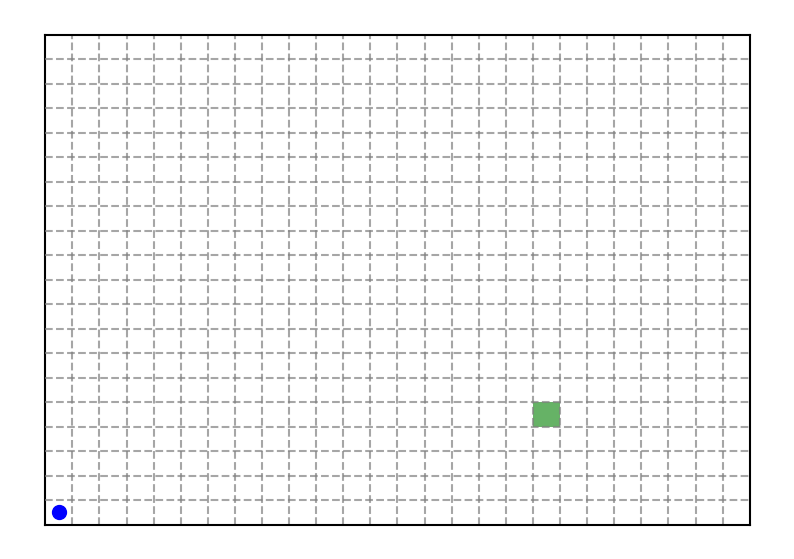

KeyboardInterrupt: 

In [50]:

agent = Robot(4)
num_episodes = 10
for i in range(num_episodes):
    board, reward_point, _ = reset_env(1,0,0)
    env = Aligient(board)
    state = env.reset()
    draw_pic(board, bot_pos=env.get_pos_from_state(state))
    while True:
        env.choose_action(state, reward_point)
        state, trace, reward, done, info = env.step()
        #pos = env.get_pos_from_state(state)
        #draw_pic(board, pos)
        if done:
            draw_trace(board, trace)
            plt.savefig('figs/route'+ str(i) + '.png')
            break